In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from d2l import torch as d2l
from math import ceil, floor
from torch import nn

In [2]:
data = pd.read_csv('../data/Phuket.csv')

In [3]:
times = data['time'].to_numpy()

In [22]:
events = np.zeros(int(ceil(np.max(times))))
for i in range(0, len(times)):
    index = int(floor(times[i]))
    events[index] = events[index] + 1
events[events > 1] = 1

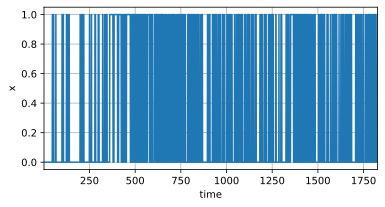

In [28]:
T = len(events)
time = torch.arange(1, T + 1, dtype=torch.float32)
x = torch.from_numpy(events.astype(np.float32))
d2l.plot(time, [x], 'time', 'x', xlim=[1, T], figsize=(6, 3))

In [29]:
tau = 100
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = x[i: T - tau + i]
labels = x[tau:].reshape((-1, 1))
batch_size, n_train = 16, 1200
train_iter = d2l.load_array((features[:n_train], labels[:n_train]), batch_size, is_train=True)

In [30]:
# Function for initializing the weights of the network
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# A simple MLP
def get_net():
    net = nn.Sequential(nn.Linear(100, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# Note: `MSELoss` computes squared error without the 1/2 factor
loss = nn.MSELoss(reduction='none')

In [31]:
def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch {epoch + 1}, '
              f'loss: {d2l.evaluate_loss(net, train_iter, loss):f}')

net = get_net()
train(net, train_iter, loss, 5, 0.01)

epoch 1, loss: 0.194193
epoch 2, loss: 0.178336
epoch 3, loss: 0.164196
epoch 4, loss: 0.158843
epoch 5, loss: 0.148873


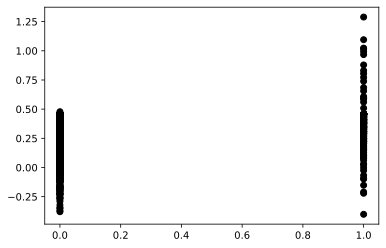

In [42]:
onestep_preds = net(features)
plt.plot(x.detach().numpy()[tau:], onestep_preds.detach().numpy(), 'ko')

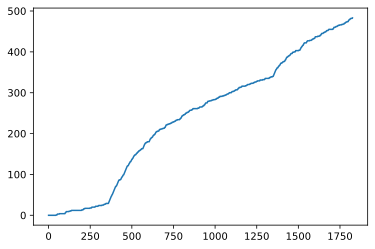

In [44]:
plt.plot(np.cumsum(events))

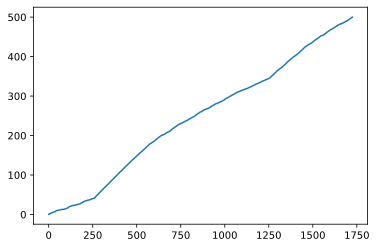

In [45]:
plt.plot(np.cumsum(onestep_preds.detach().numpy()))